## <center> École Polytechnique de Montréal <br> Département Génie Informatique et Génie Logiciel <br>  LOG6308 - Systèmes de recommandations <br> </center>

## <center> TP1 -- Approches collaboratives : utilisateur-utilisateur, item-item, et agglomérative </center>

Le travail doit être fait en **équipe de deux**.

## Identification de l'équipe: B2_eq13

### Groupe de laboratoire: B2

### Equipe numéro : 13

### Membres:

Ettahri Mahacine (2312965) <br>
Li Xuewei (1879356)

<br>

**Nature de la contribution:**

- Mahacine Ettahri 2312965 (50% de contribution. Nature de la contribution : Elle a réalisé tous les excercice du tp individuellement comme chaque coéquipière. Puis les codes réalisé ont été comparé avec les autres membres pour valider les réponses obtenues. Finalement, une version propre du tp a été réalisée ensemble en combinant le code des deux coéquipières.)
- Xuewei Li 1879356 (50% de contribution. Nature de la contribution : Elle a réalisé tous les excercice du tp individuellement comme chaque coéquipière. Puis les codes réalisé ont été comparé avec les autres membres pour valider les réponses obtenues. Finalement, une version propre du tp a été réalisée ensemble en combinant le code des deux coéquipières.)

### Enoncé du TP

Ce notebook se trouve sous l'énoncé général du TP au lien [cours.polymtl.ca/MDesmarais/log6308/20251/Tp/tp1.html](https://cours.polymtl.ca/MDesmarais/log6308/20251/Tp/tp1.html).  Les données sont accessibles de ce lien.<br>

### Jeux de données

Vous avez 3 fichiers à votre disposition:

- 'Data/votes.csv': Matrice de données de 100 000 votes faits par 943 utilisateurs et portant sur 1682 items.
    - **user.id**: Indentifiant de l'utilisateur
    - **item.id**: Identifiant de l'item/film
    - **rating**: vote attribué à l'item par l'utilisateur
    - **timestamp**: Date d'enregistrement du vote (à ignorer pour ce TP)
- 'Data/items.csv': Matrice de données sur les films
    - **movie.id**: Identifiant du film
    - **movie.title**: Nom du film
    - **release.date**: Date de sortie
    - **video.release.date**: Date de sortie de la video
    - **IMDb.URL**: Lien vers le film
    - les 19 autres champs sont les categories des films qui sont les suivantes:
        "unknown", "Action", "Adventure", "Animation", "Children's", "Comedy", "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"
- 'Data/u.csv': Matrice de données sur les utilisateurs
    - **id**: Identififiant de l'utilisateurs
    - **age**: Age de l'utilisateur
    - **gender**: Sexe de l'utilisateur
    - **job**: Emploi de l'utilisateur
    - **zip**: ZIP Code

Attention aux espaces et à la casse des differents champs.

### Librairies permises

- numpy
- pandas
- seaborn
- matplotlib


### Rédaction et remise du rapport

- Ce notebook constitue à la fois votre code et votre rapport. Il contient un squelette pour guider votre travail.

- Complétez directement le notebook, vous êtes libres de créer des nouvelles cellules de code ou de texte.

- <u>**IMPORTANT**</u> Remettez le ZIP contenant les données et le notebook sur Moodle avec le nom `MATRICULE1_MATRICULE2.ipynb` pour le notebook et `MATRICULE1_MATRICULE2.zip` pour le zip.


### CRITÈRES

- La démarche est valide et bien expliquée
- Les réponses sont correctes et commentées
- L'implémentation est performante et repose sur le calcul linéaire lorsqu'approprié
- La présentation est soignée et bien rédigée


### CODE D’HONNEUR

- __Règle 1__:  Le plagiat de code est bien évidemment interdit. Toute utilisation de code doit être référencée adéquatement. Vous __ne pouvez pas__ soumettre un code écrit par quelqu’un d’autre.

- __Règle 2__: Vous êtes libres de discuter des idées et des détails de mise en œuvre avec d'autres équipes. Cependant, vous ne pouvez en aucun cas consulter le code d'une autre équipe ou incorporer leur code dans votre TP.

- __Règle 3__:  Vous ne pouvez pas partager votre code publiquement (par exemple, dans un dépôt GitHub public) tant que le cours n'est pas fini.

## Question 1

### 1. Chargement des assets

#### 1.1. Chargement des librairies

In [41]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy

#### 1.2. Chargement des données

Affichez tous les jeux de données

In [43]:
# TODO  --------------------------------- Préparation des Données ------------------------
# Chargement des votes
votes = pd.read_csv('Data/ratings.csv')
# items
items = pd.read_csv('Data/items.csv')
# users
user = pd.read_csv('Data/user.csv')
# End TODO

In [44]:
### TODO: Afficher les jeux de donnes
votes.head()

,user.id,item.id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [45]:
items.head()

,movie.id,movie.title,release.date,video.release.date,IMDb.URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [46]:
user.head()

,id,age,gender,job,zip
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


### 1.3. Calcul de performances

On désire calculer les performances prédictives de quelques approches qui donnent une base de référence: le vote aléatoire, le vote moyen, le vote moyen utilisateur, le vote moyen item et finalement, le vote attendu (moyenne du vote moyen utilisateur et item). Puis rapporter l'erreur quadratique moyenne et l'erreur absolue moyenne (1) sans validation croisée et (2) avec validation croisée de 5 replis. Et enfin, déterminer si la différence entre l'erreur quadratique moyenne obtenue par le vote moyen item et le vote moyen utilisateur est statistiquement significative par un test d'hypothèse et en affichant les résultats visuellement. Pour cela, on procède en plusieurs étapes.


#### 1.3.1. Prétrairements
L’objectif ici est de créer une matrice utilisateurs-items qui, à chaque utilisateur, associe les votes qu’il a attribués aux films.

In [47]:
## Conversion du Pandas Datafram en Matrice Utilisateur Item : MUI
MUI = votes.pivot(index="user.id", columns="item.id", values="rating")
MUI.head()

item.id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user.id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
## Convertir le DF à une matrice numpy
MUI_numpy = MUI.to_numpy()
MUI_numpy_flat = MUI_numpy.reshape(-1)

### 1.3.2. Fonctions de calcul d'erreurs

Afin de calculer l'erreur quadratique moyenne et l'erreur absolue moyenne vous devez utiliser les fonctions ci-dessous. Completez leurs codes.

In [49]:
# Définir l'erreur en excluant les éléments NaN et 0
def RMSE_mat(y_pred, y_true):
    mask = (y_true != 0) & (y_pred != 0)
    return np.sqrt(np.nanmean((y_pred[mask] - y_true[mask]) ** 2))

In [50]:
def MAE_mat(y_pred, y_true):
    mask = (y_true != 0) & (y_pred != 0)
    return np.nanmean(np.absolute(y_pred[mask] - y_true[mask]))

#### 1.3.3. Calcul des performances sans validation croisée

La validation croisée est une technique qui permet d'évaluer les performances d'un modèle/système sur de nouvelles données. Elle permet d'évaluer la capacité d'un modèle à généraliser la comprehension d’un problème. C’est-à-dire, à faire de bonnes prédictions sur des données qu’il n’a pas encore vues. Dans cet exercice, elle nous permet de savoir si l'approche employée permet de prédire correctement les votes attendues. Mais avant d'y arriver, dans cet exercice, afin de bien comprendre l'intérêt de cette technique, il est intéressant de commencer par une approche sans validation croisée (on utilise toutes les données).

Le code ci-dessous permet de calculer les prédictions de votes sans validation croisée. Complétez-le et commentez les résultats.

In [51]:
# TODO
## Vote aleatoire
np.random.seed(42)
votes_alea_pred_all = np.random.randint(1, 6, size=MUI_numpy.shape)

## Vote moyen
votes_moyenne_pred_all = np.full(MUI_numpy.shape, np.nanmean(MUI_numpy))

## Vote moyen utilisateur
votes_moyenne_U_pred_all = np.zeros_like(MUI_numpy)
user_means = np.nanmean(MUI_numpy, axis=1)
votes_moyenne_U_pred_all[:] = user_means[:, np.newaxis]

## Vote moyen item
votes_moyenne_I_pred_all = np.zeros_like(MUI_numpy)
item_means = np.nanmean(MUI_numpy, axis=0)
votes_moyenne_I_pred_all[:] = item_means[np.newaxis, :]

## Vote Moyen Attendu (Moyenne du vote moyen utilisateur et item)
moyenne_U_repeat_all = np.repeat(user_means[:, np.newaxis], MUI_numpy.shape[1], axis=1)
moyenne_I_repeat_all = np.repeat(item_means[np.newaxis, :], MUI_numpy.shape[0], axis=0)
votes_moyenne_A_pred_all = 0.5 *(moyenne_U_repeat_all + moyenne_I_repeat_all)

# Erreur quadratique moyenne & Erreur absolue moyenne
list_RMSE_all = []
list_MAE_all = []
list_matrices_all = [votes_alea_pred_all, votes_moyenne_pred_all, votes_moyenne_U_pred_all, votes_moyenne_I_pred_all, votes_moyenne_A_pred_all]

list_RMSE_all.append(np.array([RMSE_mat(mat, MUI_numpy) for mat in list_matrices_all]))
list_MAE_all.append(np.array([MAE_mat(mat, MUI_numpy) for mat in list_matrices_all]))

list_RMSE_all = np.array(list_RMSE_all).reshape(-1)
list_MAE_all = np.array(list_MAE_all).reshape(-1)

print("Résultats pour le vote aléatoire sur l'ensemble de données :")
print("RMSE: ", list_RMSE_all[0])
print("MAE: ", list_MAE_all[0],'\n')

print("Résultats pour le vote moyen sur l'ensemble de données :")
print("RMSE: ", list_RMSE_all[1])
print("MAE: ", list_MAE_all[1],'\n')

print("Résultats pour le vote moyen utilisateur sur l'ensemble de données :")
print("RMSE: ", list_RMSE_all[2])
print("MAE: ", list_MAE_all[2],'\n')

print("Résultats pour le vote moyen item sur l'ensemble de données :")
print("RMSE: ", list_RMSE_all[3])
print("MAE: ", list_MAE_all[3],'\n')

print("Résultats pour le vote moyen attendu sur l'ensemble de données :")
print("RMSE: ", list_RMSE_all[4])
print("MAE: ", list_MAE_all[4],'\n')

Résultats pour le vote aléatoire sur l'ensemble de données :
RMSE:  1.881581781374384
MAE:  1.50765 

Résultats pour le vote moyen sur l'ensemble de données :
RMSE:  1.1256679707622492
MAE:  0.9447000499999999 

Résultats pour le vote moyen utilisateur sur l'ensemble de données :
RMSE:  1.0308117943828063
MAE:  0.8262264099536629 

Résultats pour le vote moyen item sur l'ensemble de données :
RMSE:  1.0000700195275787
MAE:  0.7989582428029238 

Résultats pour le vote moyen attendu sur l'ensemble de données :
RMSE:  0.9668089878000198
MAE:  0.7825830601768504 



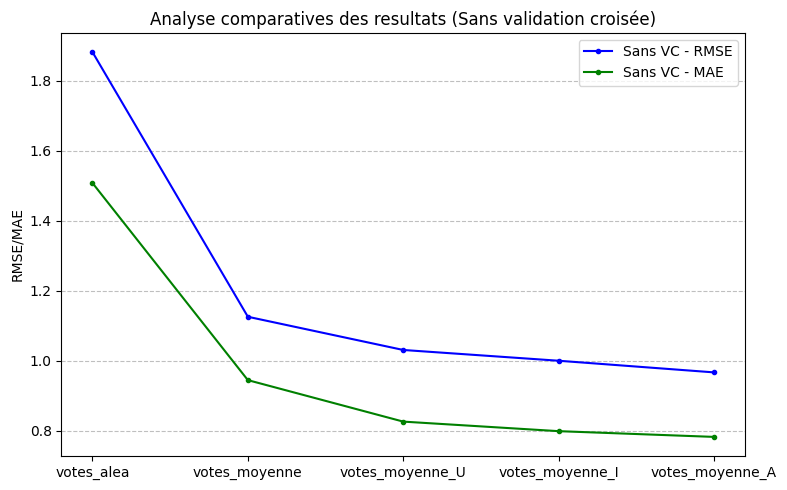

In [52]:
# Graphique des erreurs en fonction de la méthode choisie
fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(range(5), list_RMSE_all, marker='.', color='blue', linestyle='-', label="Sans VC - RMSE")
ax.plot(range(5), list_MAE_all, marker='.', color='green', linestyle='-', label="Sans VC - MAE")

ax.set_ylabel('RMSE/MAE')
ax.set_title('Analyse comparatives des resultats (Sans validation croisée)')
ax.set_xticks(range(5))
ax.set_xticklabels(['votes_alea', 'votes_moyenne', 'votes_moyenne_U', 'votes_moyenne_I', 'votes_moyenne_A'])
ax.grid(True, axis='y', linestyle='--', color='gray', alpha=0.5)
ax.legend()
plt.tight_layout()
plt.show()

# Commentez les resultats
- Vote aléatoire : Le vote aléatoire donne des RMSE et MAE élevés, ce qui indique que cette méthode ne permet pas de prédire correctement les valeurs par rapport aux vraies valeurs. Cela est attendu, car le vote aléatoire ne tient pas compte des interactions des utilisateurs avec les films.
- Vote moyen : Le vote moyen, qui consiste à utiliser la moyenne des valeurs observées, donne des résultats meilleurs que le vote aléatoire. Par contre, RMSE et MAE restent relativement élevés, ce qui suggère que cette méthode n'est pas optimale pour capturer la complexité des données.
- Vote moyen utilisateur : En utilisant le vote moyen utilisateur, les performances s'améliorent par rapport au vote moyen général. Cela montre que la prise en compte des comportements spécifiques des utilisateurs dans la prédiction peut offrir de meilleurs résultats que la simple moyenne générale.
- Vote moyen item : Le vote moyen basé sur les items continue d'améliorer les performances. Cette méthode est plus adaptée que celle basée sur l'utilisateur, car il est plus facile de trouver des items similaires que de trouver des utilisateurs ayant exactement les mêmes préférences.
- Vote moyen attendu : Le vote moyen attendu donne les meilleures performances parmi toutes les méthodes testées. Cette méthode peut être vue comme une combinaison des moyennes pondérées (utilisateur et item). Elle permet de capturer à la fois les préférences individuelles et la popularité des films.

Il est important de noter que ces résultats ont été obtenus sans validation croisée. Afin d'obtenir des résultats plus robustes et d'éviter les risques de surapprentissage, une validation croisée serait nécessaire.

#### 1.3.4. Calcul des performances avec validation croisée

Les cellules ci-dessous contiennent le code pour faire la prediction de votes et le calcul des erreurs quadratiques moyennes et erreurs absolue moyenne. Completez le et commentez les resultats.

In [53]:
np.random.seed(42)

## Création des indices pour les valeurs différentes de np.nan
indices = np.arange(0, MUI_numpy.shape[0]*MUI_numpy.shape[1])
indices_na = indices[~np.isnan(MUI_numpy_flat)]

## Split Train Test des indices
nbre_replis = 5
np.random.shuffle(indices_na)

idx_split = np.split(indices_na, nbre_replis)

print(indices_na.shape)

(100000,)


In [54]:
## Je construis ma liste d'indice train et test
# Pour faire une cross validation à 5 replis il suffit de remplacer 0 par i
# et itérer de 0 à 4
list_RMSE = []
list_MAE = []

for i in range(nbre_replis):
    idx_train = np.delete(idx_split, i, axis=0).flatten() # Liste d'indices train
    idx_test = idx_split[i] # Liste d'indices test

    ## J'enlève les valeurs de test de la matrice d'entrainement, et vice versa
    MUI_numpy_train = MUI_numpy_flat.copy()
    MUI_numpy_train[idx_test] = np.nan
    MUI_numpy_test = MUI_numpy_flat.copy()
    MUI_numpy_test[idx_train] = np.nan

    #  Je redonne la structure de matrice aux ensembles de test et d'entrainement
    MUI_numpy_train = MUI_numpy_train.reshape(MUI_numpy.shape)
    MUI_numpy_test = MUI_numpy_test.reshape(MUI_numpy.shape)

    # On s'assure d'avoir les bonnes dimensions
    print("Dimensions des matrices :")
    print(MUI_numpy_train.shape)
    print(MUI_numpy_train[~np.isnan(MUI_numpy_train)].shape)
    print(MUI_numpy_test[~np.isnan(MUI_numpy_test)].shape)
    print('\n')

    # Documentation pour np.nanmean : https://numpy.org/doc/stable/reference/generated/numpy.nanmean.html

    # --------------------------------- Prédictions des Valeurs Test ---------------------------------
    # Prédiction des votes aléatoires entre 1 et 5 avec une distribution uniforme d'entiers
    np.random.seed(42)
    votes_alea_pred = np.random.randint(1, 6, size=MUI_numpy_test.shape)

    # Vote Moyen
    # Prédiction des votes grâce à la moyenne des votes de la matrice d'entrainement
    votes_moyenne_pred = np.full(MUI_numpy_test.shape, np.nanmean(MUI_numpy_train))

    # Vote Moyen Utilisateur
    # Prédiction des votes grâce à la moyenne des votes par utilisateur de la matrice d'entrainement
    votes_moyenne_U_pred = np.zeros_like(MUI_numpy_test)
    user_means = np.nanmean(MUI_numpy_train, axis=1)
    votes_moyenne_U_pred[:] = user_means[:, np.newaxis]

    # Vote Moyen Item
    # Prédiction des votes grâce à la moyenne des votes par item de la matrice d'entrainement
    votes_moyenne_I_pred = np.zeros_like(MUI_numpy_test)
    item_means = np.nanmean(MUI_numpy_train, axis=0)
    votes_moyenne_I_pred[:] = item_means[np.newaxis, :]

    # Vote Moyen Attendu (Moyenne du vote moyen utilisateur et item)
    moyenne_U_repeat = np.repeat(user_means[:, np.newaxis], MUI_numpy.shape[1], axis=1)
    moyenne_I_repeat = np.repeat(item_means[np.newaxis, :], MUI_numpy.shape[0], axis=0)

    votes_moyenne_A_pred = 0.5 * (moyenne_U_repeat + moyenne_I_repeat)

    # Calcul des RMSE
    list_matrices = [votes_alea_pred, votes_moyenne_pred, votes_moyenne_U_pred, votes_moyenne_I_pred, votes_moyenne_A_pred]

    list_RMSE.append(np.array([RMSE_mat(mat, MUI_numpy_test) for mat in list_matrices]))
    list_MAE.append(np.array([MAE_mat(mat, MUI_numpy_test) for mat in list_matrices]))

list_RMSE = np.array(list_RMSE)
list_MAE = np.array(list_MAE)

print("Résultats pour le vote aléatoire sur l'ensemble de test :")
print("RMSE: ", list_RMSE.mean(axis=0)[0])
print("MAE: ", list_MAE.mean(axis=0)[0],'\n')

print("Résultats pour le vote moyen sur l'ensemble de test :")
print("RMSE: ", list_RMSE.mean(axis=0)[1])
print("MAE: ", list_MAE.mean(axis=0)[1],'\n')

print("Résultats pour le vote moyen utilisateur sur l'ensemble de test :")
print("RMSE: ", list_RMSE.mean(axis=0)[2])
print("MAE: ", list_MAE.mean(axis=0)[2],'\n')

print("Résultats pour le vote moyen item sur l'ensemble de test :")
print("RMSE: ", list_RMSE.mean(axis=0)[3])
print("MAE: ", list_MAE.mean(axis=0)[3],'\n')

print("Résultats pour le vote moyen attendu sur l'ensemble de test :")
print("RMSE: ", list_RMSE.mean(axis=0)[4])
print("MAE: ", list_MAE.mean(axis=0)[4],'\n')

Dimensions des matrices :
(943, 1682)
(80000,)
(20000,)




C:\Users\ettah\AppData\Local\Temp\ipykernel_30984\1297913250.py:48: RuntimeWarning: Mean of empty slice
  item_means = np.nanmean(MUI_numpy_train, axis=0)


Dimensions des matrices :
(943, 1682)
(80000,)
(20000,)


Dimensions des matrices :
(943, 1682)
(80000,)
(20000,)


Dimensions des matrices :
(943, 1682)
(80000,)
(20000,)


Dimensions des matrices :
(943, 1682)
(80000,)
(20000,)


Résultats pour le vote aléatoire sur l'ensemble de test :
RMSE:  1.8815752454338135
MAE:  1.50765 

Résultats pour le vote moyen sur l'ensemble de test :
RMSE:  1.1256693206118293
MAE:  0.9447048537500002 

Résultats pour le vote moyen utilisateur sur l'ensemble de test :
RMSE:  1.042354051825765
MAE:  0.8353219967028899 

Résultats pour le vote moyen item sur l'ensemble de test :
RMSE:  1.023155135374267
MAE:  0.816171102209158 

Résultats pour le vote moyen attendu sur l'ensemble de test :
RMSE:  0.9819466708198824
MAE:  0.7944988221893886 



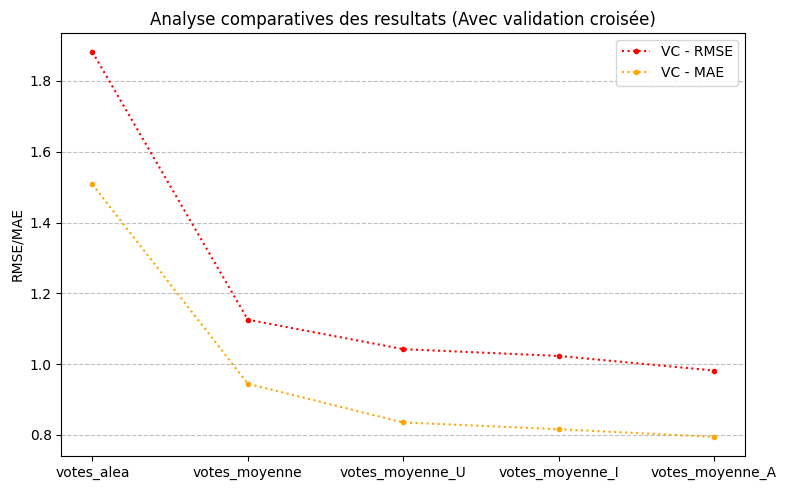

In [55]:
# Graphique des erreurs en fonction de la méthode choisie
#TODO
fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(range(5), list_RMSE.mean(axis=0).flatten(), marker='.', color='red', linestyle=':', label="VC - RMSE")
ax.plot(range(5), list_MAE.mean(axis=0).flatten(), marker='.', color='orange', linestyle=':', label="VC - MAE")

ax.set_ylabel('RMSE/MAE')
ax.set_title('Analyse comparatives des resultats (Avec validation croisée)')
ax.set_xticks(range(5))
ax.set_xticklabels(['votes_alea', 'votes_moyenne', 'votes_moyenne_U', 'votes_moyenne_I', 'votes_moyenne_A'])
ax.grid(True, axis='y', linestyle='--', color='gray', alpha=0.5)
ax.legend()
plt.tight_layout()
plt.show()
#End TODO

# Commentez les resultats

A l'instar des méthodes sans validation croisée, on obtient les résultats suivants :
- Vote aléatoire : Le vote aléatoire donne des RMSE et MAE élevés, ce qui indique que cette méthode ne permet pas de prédire correctement les valeurs par rapport aux vraies valeurs. Cela est attendu, car le vote aléatoire ne tient pas compte des interactions des utilisateurs avec les films
- Vote moyen : Le vote moyen, qui consiste à utiliser la moyenne des valeurs observées, donne des résultats meilleurs que le vote aléatoire. Par contre, RMSE et MAE restent relativement élevés, ce qui suggère que cette méthode n'est pas optimale pour capturer la complexité des données.
- Vote moyen utilisateur : En utilisant le vote moyen utilisateur, les performances s'améliorent par rapport au vote moyen général. Cela montre que la prise en compte des comportements spécifiques des utilisateurs dans la prédiction peut offrir de meilleurs résultats que la simple moyenne générale.
- Vote moyen item : Le vote moyen basé sur les items continue d'améliorer les performances. Cette méthode est plus adaptée que celle basée sur l'utilisateur, car il est plus facile de trouver des items similaires que de trouver des utilisateurs ayant exactement les mêmes préférences.
- Vote moyen attendu : Le vote moyen attendu donne les meilleures performances parmi toutes les méthodes testées. Cette méthode peut être vue comme une combinaison des moyennes pondérées (utilisateur et item). Elle permet de capturer à la fois les préférences individuelles et la popularité des films.


### 1.4. Analysez des resultats

On souhaite analyse et valider les resultats obtenus

#### 1.4.1. Analyse comparatives des resultats

Faites une analyse comparative des résultats obtenus sans et avec la validation croisée. À quoi s'attendaient-t-on ? Qu'est-ce qu'on a obtenu? Pourquoi ?

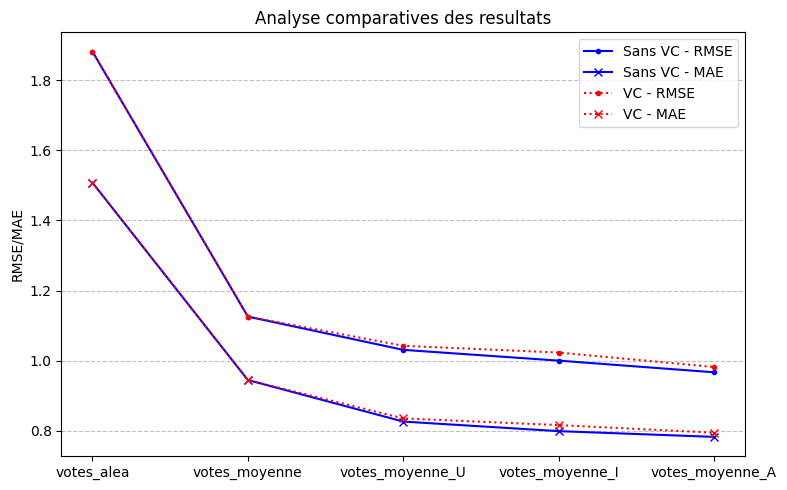

In [56]:
#TODO
# Graphique des erreurs en fonction de la méthode choisie avec et sans validation croisée
fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(range(5), list_RMSE_all, marker='.', color='blue', linestyle='-', label="Sans VC - RMSE")
ax.plot(range(5), list_MAE_all, marker='x', color='blue', linestyle='-', label="Sans VC - MAE")
ax.plot(range(5), list_RMSE.mean(axis=0).flatten(), marker='.', color='red', linestyle=':', label="VC - RMSE")
ax.plot(range(5), list_MAE.mean(axis=0).flatten(), marker='x', color='red', linestyle=':', label="VC - MAE")

ax.set_ylabel('RMSE/MAE')
ax.set_title('Analyse comparatives des resultats')
ax.set_xticks(range(5))
ax.set_xticklabels(['votes_alea', 'votes_moyenne', 'votes_moyenne_U', 'votes_moyenne_I', 'votes_moyenne_A'])
ax.grid(True, axis='y', linestyle='--', color='gray', alpha=0.5)
ax.legend()
plt.tight_layout()
plt.show()
#End TODO

# Analyse

L'application de la validation croisée nous permet d'évaluer la généralisabilité de chacune des approches employées et de réduire le risque de surapprentissage.

Généralement, on s'attend à ce que la validation croisée fournisse des estimations de performance plus stables, réalistes et parfois meilleures. Cependant, on obtient des **résultats quasi similaires avec et sans validation croisée** : les méthodes de prédiction par vote progressent en performance, du vote aléatoire au vote moyen attendu, ce dernier combinant les moyennes utilisateur et item pour offrir les meilleurs résultats en capturant à la fois les préférences individuelles et la popularité des films.

On peut expliquer cette similarité par les facteurs suivants :

1. **Stabilité des moyennes** : Les moyennes des utilisateurs et des items, bien qu'elles soient calculées sur des sous-ensembles différents dans chaque itération de la validation croisée, restent relativement stables, ce qui mène à des prédictions similaires.
   
2. **Répartition homogène des données** : On peut penser que les données sont assez homogènes (par exemple, les utilisateurs ont des comportements de vote similaires ou les items ont des caractéristiques proches), et donc les moyennes calculées sur chaque sous-ensemble d'entraînement peuvent être très proches de celles calculées sur l'ensemble complet, rendant les résultats assez similaires.

3. **Simplicité des méthodes** : Les techniques de vote utilisées (comme les moyennes) sont relativement simples et ne nécessitent pas une fine modélisation des relations complexes entre les utilisateurs et les items. Cela fait que les prédictions, même avec validation croisée, ne varient pas significativement par rapport à celles obtenues sans validation croisée.

#### 1.4.2. Test d'hypothèse
On souhaites déterminer si la différence entre l'erreur quadratique moyenne obtenue par le vote moyen item et le vote moyen utilisateur est statistiquement significative. Faites un test d'hypothèse à cet fin.

In [57]:
# TODO
## t-Test: Avec validation croisée RMSE (Calcul détaillé)
user_means = list_RMSE.mean(axis=0)[2]
item_means = list_RMSE.mean(axis=0)[3]
user_var = list_RMSE.var(axis=0, ddof=1)[2]
item_var = list_RMSE.var(axis=0, ddof=1)[3]
user_size = len(list_RMSE)
item_size = len(list_RMSE)
t_stat = (user_means - item_means)/ np.sqrt(user_var/user_size + item_var/item_size)
df = (user_var/user_size + item_var/item_size)**2
df /= ((user_var/user_size)**2/(user_size-1) + (item_var/item_size)**2/(item_size-1))
p_value = 2 * (1 - scipy.stats.t.cdf(abs(t_stat), df))
print('t-Test: Avec validation croisée RMSE')
print(f't_stat : {t_stat}, p_value : {p_value}, df : {df}')
# End TODO

t-Test: Avec validation croisée RMSE
t_stat : 7.546648236740136, p_value : 0.0003017749047686813, df : 5.909599764663794


In [58]:
## t-Test: Avec validation croisée RMSE (Avec la librarie Scipy)
test_vc = scipy.stats.ttest_ind(list_RMSE[:,2], list_RMSE[:,3], equal_var = False)
print('t-Test: Avec validation croisée RMSE')
test_vc

t-Test: Avec validation croisée RMSE


Ttest_indResult(statistic=7.546648236740136, pvalue=0.0003017749047687487)

In [59]:
## t-Test: Avec validation croisée MAE (Calcul détaillé)
user_means = list_MAE.mean(axis=0)[2]
item_means = list_MAE.mean(axis=0)[3]
user_var = list_MAE.var(axis=0, ddof=1)[2]
item_var = list_MAE.var(axis=0, ddof=1)[3]
user_size = len(list_MAE)
item_size = len(list_MAE)
t_stat = (user_means - item_means)/ np.sqrt(user_var/user_size + item_var/item_size)
df = (user_var/user_size + item_var/item_size)**2
df /= ((user_var/user_size)**2/(user_size-1) + (item_var/item_size)**2/(item_size-1))
p_value = 2 * (1 - scipy.stats.t.cdf(abs(t_stat), df))
print('t-Test: Avec validation croisée MAE')
print(f't_stat : {t_stat}, p_value : {p_value}, df : {df}')
# End TODO

t-Test: Avec validation croisée MAE
t_stat : 9.114260752037357, p_value : 3.67703566703792e-05, df : 7.075881686049828


In [60]:
## t-Test: Avec validation croisée MAE (Avec la librarie Scipy)
test_vc = scipy.stats.ttest_ind(list_MAE[:,2], list_MAE[:,3], equal_var = False)
print('t-Test: Avec validation croisée MAE')
test_vc

t-Test: Avec validation croisée MAE


Ttest_indResult(statistic=9.114260752037357, pvalue=3.677035667026624e-05)

# Analyse
- Approche validation croisée : La p-value est inférieure à 0,05, cela signifie que la différence entre les erreurs des deux méthodes (vote moyen item et vote moyen utilisateur) est suffisamment grande pour être considérée comme significative.
- On rejète donc l'hypothèse nulle (qui stipule que les deux méthodes ont des performances identiques).Cela suggère que l'approche du vote moyen item est plus performante que celle du vote moyen utilisateur en termes d'erreur.

## Question 2 - Filtres Collaboratifs

On désire calculer les erreurs des prédictions des approches de filtres collaboratifs item-item et utilisateur-utilisateur. Pour cela, on se propose d'utiliser les fonctions ci-dessous qui permettent de:
 - Calculer la similarité cosinus entre deux vecteurs/matrices ;
 - Predire les votes par l'approche filtrage collaboratifs .

Completez les!

In [61]:
## Similarité Cosinus entre les vecteurs ligne de la matrice A
#  et les vecteurs ligne de la matrice B
def cosinus_matrices(A, B):
    A = A.copy()
    B = B.copy()

    # Remplace les nan par 0, pour ne pas rajouter + de NAN après le produit matriciel
    A = np.nan_to_num(A)
    B = np.nan_to_num(B)

    # Matrice colonne des normes de chacuns des vecteurs de A
    col_norm_A = np.linalg.norm(A, axis=-1)[:, None]

    # Matrice ligne des normes de chacuns des vecteurs de B
    col_norm_B = np.expand_dims(np.linalg.norm(B, axis=-1), axis=0)

    cos_sim = np.dot(A, B.T) / np.dot(col_norm_A, col_norm_B)

    return cos_sim

In [62]:
def filtre_collaboratif(V, W):

    # Crée une matrice booléenne de la même taille que V. Les éléments qui ne sont pas NaN dans V
    # (c'est-à-dire les éléments pour lesquels une note existe) sont marqués par 1, et les NaN par 0.
    # Cette matrice sera utilisée pour s'assurer que seules les notes existantes contribuent aux prédictions.
    Bool_m = (~np.isnan(V))*1

    V = V.copy()
    W = W.copy()

    # Les valeurs NaN dans V et W sont remplacées par 0. Cela permet d'effectuer des opérations matricielles numpy sans erreur.
    V = np.nan_to_num(V)
    W = np.nan_to_num(W)

    # Calcule la somme des similarités absolues pour chaque utilisateur, mais seulement pour les items qu'ils ont notés (grâce à Bool_m).
    K = np.dot(np.abs(W), Bool_m) + 1e-30
    nom = np.dot(W, V)

    # Calcule les notes prédites.
    votes_pred = np.divide(nom, K)

    return votes_pred

In [63]:
# Exemple (Code de démarrage)
m = np.array([
    [2, 4, np.nan, np.nan, np.nan],
    [np.nan, np.nan, 4, np.nan, 4],
    [5, np.nan, 5, 5, np.nan],
    [2, np.nan, 5, np.nan, 5]
])

u_cos = cosinus_matrices(m,m)
np.fill_diagonal(u_cos, 0)
u_u = filtre_collaboratif(m, u_cos)
print(u_u)
print("-" * 60)

i_cos = cosinus_matrices(m.T,m.T)
np.fill_diagonal(i_cos, 0)
i_i = filtre_collaboratif(m.T, i_cos).T
print(i_i)
print("-" * 60)
print(round(RMSE_mat(u_u, m), 6))

[[4.03886828 0.         5.         5.         5.        ]
 [2.89364903 0.         5.         5.         5.        ]
 [2.         4.         4.5739515  0.         4.5739515 ]
 [4.4563721  4.         4.36368456 5.         4.        ]]
------------------------------------------------------------
[[4.         2.         2.         2.         2.        ]
 [4.         0.         4.         4.         4.        ]
 [5.         5.         5.         5.         5.        ]
 [5.         2.         3.53726115 3.24264069 4.23059913]]
------------------------------------------------------------
1.687349


Maintenant, pour le calcul des differents erreur, procédez par étapes et rapportez, à chaque étape, l'erreur quadratique moyenne et l'erreur absolue moyenne à partir de la matrice de prédiction obtenue à l'aide de la matrice cosinus de similarité.

M_pred = MUI x M_cos

## 2 -a) Prédiction avec tous les utilisateurs/items

Prediction (sans voisins rapprochés) et sans correction pour biais utilisateur/item (sans normaliser en soustrayant la moyenne utilisateur/item)

In [64]:
# TODO
## Approche Utilisateur
# Calculer la similarité cosinus
u_cos = cosinus_matrices(MUI_numpy, MUI_numpy)
# Mettre les éléments de la diagonale à 0 pour éviter qu'un utilisateur soit considéré comme le plus similaire à lui-même.
np.fill_diagonal(u_cos, 0)
# Prédire en utilisant le filtre collaboratif
user_user = filtre_collaboratif(MUI_numpy, u_cos)

print("Prédiction avec tous les utilisateurs :")
print("RMSE: ", RMSE_mat(user_user, MUI_numpy))
print("MAE: ", MAE_mat(user_user, MUI_numpy))
#End TODO

Prédiction avec tous les utilisateurs :
RMSE:  1.0117680426285873
MAE:  0.806447361350381


In [65]:
# TODO
## Approche Item
i_cos = cosinus_matrices(MUI_numpy.T, MUI_numpy.T)
np.fill_diagonal(i_cos, 0)
item_item = filtre_collaboratif(MUI_numpy.T, i_cos)

print("Prédiction avec tous les items :")
print("RMSE: ", RMSE_mat(item_item, MUI_numpy.T))
print("MAE: ", MAE_mat(item_item, MUI_numpy.T))
#End TODO

Prédiction avec tous les items :
RMSE:  1.0120812845228617
MAE:  0.8050720999491388


## 2 -b) Correction pour biais utilisateur/item.

Vous pouvez prendre l'ensemble des les valeurs observées dans le calcul des moyennes items et utilisateurs (des précisions sur ce point seront données en classe — voir aussi le bonus)


> Ici le biais utilisé est le Vote moyen.  
Attention (Moyenne du vote moyen utilisateur et item)

In [66]:
#TODO -- Notre Baseline

## Calcul de la moyenne attendue
# Vote Moyen Utilisateur
votes_moyenne_U_pred = np.zeros_like(MUI_numpy)
user_means = np.nanmean(MUI_numpy, axis=1)
votes_moyenne_U_pred[:] = user_means[:, np.newaxis]

# Prédiction des votes grâce à la moyenne des votes par item de la matrice d'entrainement
votes_moyenne_I_pred = np.zeros_like(MUI_numpy)
item_means = np.nanmean(MUI_numpy, axis=0)
votes_moyenne_I_pred[:] = item_means[np.newaxis, :]

# Vote Moyen Attendu (Moyenne du vote moyen utilisateur et item)
moyenne_U_repeat = np.repeat(user_means[:, np.newaxis], MUI_numpy.shape[1], axis=1)
moyenne_I_repeat = np.repeat(item_means[np.newaxis, :], MUI_numpy.shape[0], axis=0)

votes_moyenne_A_pred = 0.5 * (moyenne_U_repeat + moyenne_I_repeat)

# Notre Baseline
R_moy = votes_moyenne_A_pred
print(R_moy)
print("-"*80)

print("Prédiction avec tous les utilisateurs/items (Baseline) :")
print("RMSE: ", RMSE_mat(R_moy, MUI_numpy))
print("MAE: ", MAE_mat(R_moy, MUI_numpy))

#End TODO

[[3.74430635 3.40820049 3.32181373 ... 2.80514706 3.30514706 3.30514706]
 [3.793998   3.45789214 3.37150538 ... 2.85483871 3.35483871 3.35483871]
 [3.33730744 3.00120158 2.91481481 ... 2.39814815 2.89814815 2.89814815]
 ...
 [3.96188656 3.62578071 3.53939394 ... 3.02272727 3.52272727 3.52272727]
 [4.07207068 3.73596483 3.64957806 ... 3.13291139 3.63291139 3.63291139]
 [3.64451643 3.30841058 3.22202381 ... 2.70535714 3.20535714 3.20535714]]
--------------------------------------------------------------------------------
Prédiction avec tous les utilisateurs/items (Baseline) :
RMSE:  0.9668089878000198
MAE:  0.7825830601768504


NB : Il est possible d'utiliser la matrice de vote moyen utilisateur ou item au lieu d'utiliser le vote attendu. Néanmoins le vote attendu donne de meilleurs résultats.

In [67]:
# Définir la fonction de filtrage collaboratif sans biais
def filtre_collaboratif_sans_biais(V, W, votes_moyenne):

    # Créer un masque Booléen pour indiquer les valeurs non manquantes
    Bool_m = (~np.isnan(V)) * 1

    # Créer des copies des matrices pour ne pas modifier les entrées originales
    V = V.copy()
    W = W.copy()

    # Remplacer les NaN par 0 dans les matrices V et W
    V = np.nan_to_num(V)
    W = np.nan_to_num(W)

    # Calculer K, qui représente la somme des poids absolus multipliée par le masque Booléen
    K = np.dot(np.abs(W), Bool_m) + 1e-30

    # Soustraire la moyenne de chaque vote pour normaliser les données (on ne soustrait pas la moyenne des votes nuls)
    nom = np.dot(W, V - np.where(V == 0, 0, votes_moyenne))

    # Calculer les prédictions en divisant par K
    votes_pred = np.divide(nom, K)

    # Ajouter la moyenne pour corriger et équilibrer les prédictions
    return votes_pred + votes_moyenne

In [68]:
#TODO : Approche Utilisateur
## Calculer la matrice de vote User-User sans biais
# MUI_WB_U_U = MUI -

#Code
u_cos = cosinus_matrices(MUI_numpy, MUI_numpy)
np.fill_diagonal(u_cos, 0)
MUI_WB_U_U = filtre_collaboratif_sans_biais(MUI_numpy, u_cos, votes_moyenne_U_pred)
print("Matrices de prédictions :")
print(MUI_WB_U_U)
print("-"*80)

print("Prédiction avec tous les utilisateurs (sans biais) :")
print("RMSE: ", RMSE_mat(MUI_WB_U_U, MUI_numpy))
print("MAE: ", MAE_mat(MUI_WB_U_U, MUI_numpy))

#End TODO

Matrices de prédictions :
[[3.9286798  3.35822612 3.17089107 ... 2.48879879 3.62963113 3.24436352]
 [3.98586068 3.42602069 3.2237021  ... 2.58818209 3.72901444 3.34374682]
 [3.12104758 2.4885335  2.41867092 ... 1.67480097 2.81563331 2.4303657 ]
 ...
 [4.38895764 3.79095171 3.6612983  ... 2.92395922 4.06479156 3.67952395]
 [4.57778697 4.00350119 3.80670932 ... 3.14432746 4.2851598  3.89989219]
 [3.75679252 3.16698079 3.03943996 ... 3.41071429 3.4300513  3.04478369]]
--------------------------------------------------------------------------------
Prédiction avec tous les utilisateurs (sans biais) :
RMSE:  0.9384815265473094
MAE:  0.7386667298339815


In [69]:
#TODO : Approche Item
## Calculer la matrice de vote Item-Item sans biais
# MUI_WB_I_I = MUI.T - ?

# Code
i_cos = cosinus_matrices(MUI_numpy.T, MUI_numpy.T)
np.fill_diagonal(i_cos, 0)
MUI_WB_I_I = filtre_collaboratif_sans_biais(MUI_numpy.T, i_cos, votes_moyenne_I_pred.T)
print("Matrices de prédictions :")
print(MUI_WB_I_I)
print("-"*80)

print("Prédiction avec tous les items (sans biais) :")
print("RMSE: ", RMSE_mat(MUI_WB_I_I, MUI_numpy.T))
print("MAE: ", MAE_mat(MUI_WB_I_I, MUI_numpy.T))
#End TODO

Matrices de prédictions :
[[4.00079092 4.03780029 3.29180964 ... 4.21387221 4.39661433 3.85704878]
 [3.30442815 3.34563055 2.68323098 ... 3.58322834 3.74980467 3.18700513]
 [3.19624491 3.15130336 2.49718508 ... 3.38838519 3.5418913  3.09646155]
 ...
 [2.00589548 2.00997852 1.69720043 ... 2.46084773 2.22915621 2.        ]
 [3.15696231 3.23075177 2.58898794 ... 3.23622533 3.50802987 3.13789844]
 [3.26994217 3.20690957 2.12779792 ... 3.41531111 3.58667454 3.07544456]]
--------------------------------------------------------------------------------
Prédiction avec tous les items (sans biais) :
RMSE:  0.9066580176982139
MAE:  0.7149301457599284


## 2 -c) Ajout de voisins rapprochés

Avec k=100 voisins rapprochés

In [70]:
# Calcul de la similarité cosinus entre utilisateurs
u_cos = cosinus_matrices(MUI_numpy, MUI_numpy)

# Remettre à zéro de la diagonale
np.fill_diagonal(u_cos, 0)

# Trier des indices des utilisateurs du plus similaire au moins similaire
sorted_idx = np.argsort(-u_cos, axis=1)

# Définir une fonction pour récupérer les k voisins les plus proches
def U_U_Voisin(k):
    # Sélectionner les indices des k voisins les plus proches pour chaque utilisateur
    top_k_idx = sorted_idx[:, :k]

    # Créer un masque booléen pour identifier les voisins les plus proches
    mask = np.zeros_like(u_cos, dtype=bool)
    rows = np.arange(u_cos.shape[0])[:, None]
    mask[rows, top_k_idx] = True

    # Appliquer le masque à la matrice de similarité cosinus pour ne garder que les voisins pertinents
    u_cos_filtered = np.where(mask, u_cos, 0)

    # Appliquer le filtrage collaboratif sans biais avec les voisins sélectionnés
    voisins_WB_U_U = filtre_collaboratif_sans_biais(MUI_numpy, u_cos_filtered, votes_moyenne_U_pred)

    # Retourner les métriques d'erreur RMSE et MAE pour les prédictions générées
    return RMSE_mat(voisins_WB_U_U, MUI_numpy), MAE_mat(voisins_WB_U_U, MUI_numpy)

# Initialisation des listes pour stocker les résultats RMSE et MAE
RMSE_mat_U_U, MAE_mat_U_U = [], []

# Affichage des résultats pour différentes valeurs de k (nombre de voisins)
print("Prédiction avec utilisateurs rapprochés (sans biais) :")
for k in range(10, 101, 10):  # Tester pour k voisins de 10 à 100 par pas de 10
    # Calculer RMSE et MAE pour chaque k
    RMSE_, MAE_ = U_U_Voisin(k)

    # Ajouter les résultats à leurs listes respectives
    RMSE_mat_U_U.append(RMSE_)
    MAE_mat_U_U.append(MAE_)

    # Afficher les résultats pour chaque valeur de k
    print(f'K voisins: {k:<5}\t RMSE: {RMSE_:<10}\t MAE: {MAE_:<10}')

Prédiction avec utilisateurs rapprochés (sans biais) :
K voisins: 10   	 RMSE: 0.9969088271657383	 MAE: 0.7747192471509846
K voisins: 20   	 RMSE: 0.961062402602581	 MAE: 0.7474123969513553
K voisins: 30   	 RMSE: 0.9480968199525702	 MAE: 0.7377655114063223
K voisins: 40   	 RMSE: 0.9406835140663938	 MAE: 0.7324787947530561
K voisins: 50   	 RMSE: 0.9366530293256053	 MAE: 0.7298706610508532
K voisins: 60   	 RMSE: 0.9338217420672252	 MAE: 0.7280765028755397
K voisins: 70   	 RMSE: 0.9325869111341183	 MAE: 0.7273318802152884
K voisins: 80   	 RMSE: 0.9315603808556411	 MAE: 0.7268895256845794
K voisins: 90   	 RMSE: 0.9302903608108591	 MAE: 0.7263068381469302
K voisins: 100  	 RMSE: 0.9301517269165757	 MAE: 0.7265207328553448


In [71]:
## Approche Item
i_cos = cosinus_matrices(MUI_numpy.T, MUI_numpy.T)
np.fill_diagonal(i_cos, 0)
sorted_idx = np.argsort(-i_cos, axis=1)

def I_I_Voisin(k):
    top_k_idx = sorted_idx[:, :k]
    mask = np.zeros_like(i_cos, dtype=bool)
    rows = np.arange(i_cos.shape[0])[:, None]
    mask[rows, top_k_idx] = True
    i_cos_filtered = np.where(mask, i_cos, 0)
    voisins_WB_I_I = filtre_collaboratif_sans_biais(MUI_numpy.T, i_cos_filtered, votes_moyenne_I_pred.T).T
    return RMSE_mat(voisins_WB_I_I, MUI_numpy), MAE_mat(voisins_WB_I_I, MUI_numpy)

RMSE_mat_I_I, MAE_mat_I_I = [], []

print("Prédiction avec items rapprochés (sans biais) :")
for k in range(10,101,10):
    RMSE_, MAE_ = I_I_Voisin(k)
    RMSE_mat_I_I.append(RMSE_)
    MAE_mat_I_I.append(MAE_)
    print(f'K voisins: {k:<5}\t RMSE: {RMSE_:<10}\t MAE: {MAE_:<10}')

Prédiction avec items rapprochés (sans biais) :
K voisins: 10   	 RMSE: 0.9198097913579728	 MAE: 0.7112986804629463
K voisins: 20   	 RMSE: 0.893188887984628	 MAE: 0.6951117986723635
K voisins: 30   	 RMSE: 0.885831563117523	 MAE: 0.6915150271419889
K voisins: 40   	 RMSE: 0.8831963928709401	 MAE: 0.6904292617381782
K voisins: 50   	 RMSE: 0.8816758595864472	 MAE: 0.6900551810101925
K voisins: 60   	 RMSE: 0.8818186979453801	 MAE: 0.6907441456126643
K voisins: 70   	 RMSE: 0.8820066908856565	 MAE: 0.6916728911593186
K voisins: 80   	 RMSE: 0.8828795276804812	 MAE: 0.6926199083081641
K voisins: 90   	 RMSE: 0.88328107260464	 MAE: 0.6933107577788528
K voisins: 100  	 RMSE: 0.8836624244468387	 MAE: 0.6938528144040552


## BONUS 1

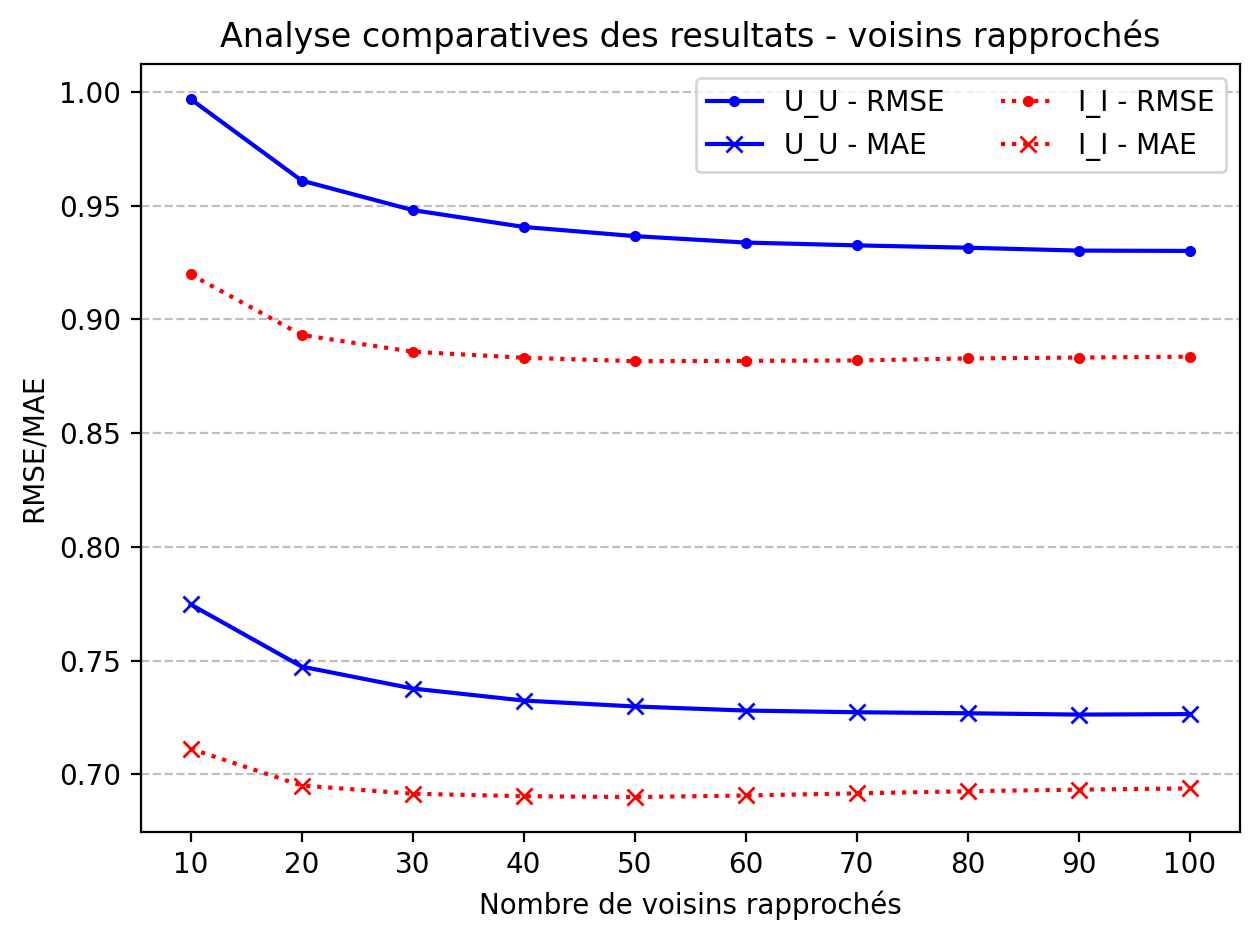

In [72]:
# Grphique des erreurs en fonction de la méthode (U-U ou I-I) et du nombre de voisins
fig, ax = plt.subplots(dpi=200)
ax.plot(range(10,101,10), RMSE_mat_U_U, marker='.', color='blue', linestyle='-', label="U_U - RMSE")
ax.plot(range(10,101,10), MAE_mat_U_U, marker='x', color='blue', linestyle='-', label="U_U - MAE")
ax.plot(range(10,101,10), RMSE_mat_I_I, marker='.', color='red', linestyle=':', label="I_I - RMSE")
ax.plot(range(10,101,10), MAE_mat_I_I, marker='x', color='red', linestyle=':', label="I_I - MAE")
ax.set_ylabel('RMSE/MAE')
ax.set_xlabel('Nombre de voisins rapprochés')
ax.set_title('Analyse comparatives des resultats - voisins rapprochés')
ax.set_xticks(range(10,101,10))
ax.grid(True, axis='y', linestyle='--', color='gray', alpha=0.5)
ax.legend(ncol=2,loc=1)
fig.tight_layout()

# Conclusions
- L'utilisation des items rapprochés, combinée à la correction des biais des items, permet d'obtenir des recommandations plus précises.
- Le nombre idéal de voisins dépend de l'approche utilisée : pour l'approche I-I, un nombre de voisins d'environ 50 est optimal. On remarque qu'à partir de 50 voisins, les erreurs augmentent légèrement ce qui peut impacter la qualité de la performance.
- Pour l'approche U-U, on remarque que les erreurs commencent à se stabiliser à partir de 60 voisins. C'est vrai que la performance optimale est atteinte pour 100 voisins, mais en raison d'efficacité de calculs, on peut se contenter de 60 étant donné que la différence n'est pas significative.

# Conclusion 1 : L’impact des biais utilisateur/item et des voisins proches sur la précision des prédictions.
- Le biais peut se manifester à la fois au niveau des utilisateurs et des items. Par exemple, certains utilisateurs ont tendance à noter plus généreusement ou plus sévèrement, tandis que certains items peuvent recevoir des évaluations systématiquement plus élevées ou plus basses en fonction de leur popularité ou de leur genre. Ces biais, s'ils ne sont pas corrigés, peuvent fausser les prédictions. La correction du biais, en normalisant par la moyenne des votes des utilisateurs et des items, permet de neutraliser ces effets. Cela permet des comparaisons plus justes entre les utilisateurs et les items, améliore la précision des recommandations, et permet de mieux prédire les préférences réelles d'un utilisateur pour un item donné.
- L'idée des voisins proches est de trouver des utilisateurs ou des items similaires à ceux pour lesquels on doit prédire une note, et d’utiliser ces voisins pour effectuer une prédiction. L'utilisation des voisins proches améliore la précision des prédictions, car plutôt que de considérer toutes les données disponibles, il est plus efficace d'utiliser des voisins représentatifs, qui partagent des caractéristiques ou comportements similaires. Cela permet de réduire le bruit et d'augmenter la pertinence des recommandations.

# Conclusion 2 : Comparaison des approches U-U et I-I pour identifier leurs forces et faiblesses respectives.
- L'approche U-U recommande des items à un utilisateur en se basant sur les préférences des utilisateurs similaires. Elle prend en compte les préférences personnelles et fonctionne de manière efficace dans le cas où les données des utilisateurs sont nombreuses.
- L'approche I-I recommande des items en fonction de leur similarité avec les items déjà appréciés par l'utilisateur. Cette méthode ne dépend pas directement des utilisateurs, mais des interactions entre les items. L'approche I-I peut être plus stable et plus efficace à long terme, car les goûts des utilisateurs peuvent changer, mais les caractéristiques des items restent souvent les mêmes. Cependant, cette approche peut manquer de personnalisation, car elle tend à favoriser les items populaires, dont les évaluations sont plus nombreuses.
De plus, si un item n'a pas été évalué par beaucoup d'utilisateurs, il devient difficile de trouver des items similaires.  Tout cela peut avoir un impact sur la précision des recommandations.

## BONUS 2

In [84]:
# Fonction pour supprimer les lignes contenant des zéros dans la matrice
def deleteZeroRows(row, col, mat):
    mat_cp = np.copy(mat)
    idx = np.where(np.isnan(mat_cp[:, col]))[0]
    idx = [i for i in idx if i != row]  # Exclure la ligne en cours
    mat_cp[idx, :] = np.nan  # Remplacer les lignes restantes par NaN
    return mat_cp

# Filtrage collaboratif sans biais avec suppression des zéros
def filtre_collaboratif_sans_biais_deleteZero(row, col, V, W, votes_moyenne):
    V, W = V.copy()[:, col], W.copy()
    Bool_m = (~np.isnan(V))*1
    V, W = np.nan_to_num(V), np.nan_to_num(W)
    K = np.dot(np.abs(W), Bool_m) + 1e-30
    nom = np.dot(W, V - np.where(V == 0, 0, votes_moyenne[:, col]))
    return np.divide(nom, K) + votes_moyenne[row, col]

# Fonction pour filtrer avec la similarité cosinus et suppression des zéros
def cos_filter_deleteZero(row, col, mat, k):
    mat_cp = np.copy(mat)
    
    # Calculer la similarité cosinus pour la ligne sélectionnée
    u_cos = cosinus_matrices([mat_cp[row]], mat_cp)
    u_cos[0, row] = 0  # Mettre à zéro la similarité avec soi-même
    
    # Trier la similarité de manière décroissante
    sorted_idx = np.argsort(-u_cos, axis=1)
    top_k_idx = sorted_idx[:, :k] 
    mask = np.zeros_like(u_cos, dtype=bool)
    rows = np.arange(u_cos.shape[0])[:, None]
    mask[rows, top_k_idx] = True
    return np.where(mask, u_cos, 0)  # Remplacer les autres valeurs par 0

# Calculer les votes moyens des utilisateurs
def votes_moyenne_ligne(mat):
    votes_moyenne = np.zeros_like(mat) 
    user_means = np.nanmean(mat, axis=1)
    votes_moyenne[:] = user_means[:, np.newaxis]
    return votes_moyenne

# Fonction principale de filtrage avec la similarité cosinus filtrée
def u_cos_filtered_deleteZero(mat, k):
    mat_res = np.copy(mat)
    
    # Itération sur chaque ligne et chaque colonne de la matrice
    for row in range(mat.shape[0]):
        for col in range(mat.shape[1]):
            mat_cp = np.copy(mat)
            
            # Générer la matrice avec les réponses non nulles
            mat_ij = deleteZeroRows(row, col, mat_cp)
            
            # Calculer la similarité cosinus filtrée pour chaque position
            u_cos_filtered_ij = cos_filter_deleteZero(row, col, mat_ij, k)
            
            # Calculer les votes moyens
            votes_moyenne = votes_moyenne_ligne(mat_ij)
            
            # Appliquer le filtrage collaboratif sans biais
            mat_res[row, col] = filtre_collaboratif_sans_biais_deleteZero(row, col, 
                                                                          mat_ij, 
                                                                          u_cos_filtered_ij, 
                                                                          votes_moyenne)[0]
    
    return mat_res

### Application

In [77]:
m = np.array([
    [2, 4, np.nan, np.nan, np.nan],
    [np.nan, np.nan, 4, np.nan, 4],
    [5, np.nan, 5, 5, np.nan],
    [2, np.nan, 5, np.nan, 5],
    [np.nan, 1, 5, np.nan, 5]
])

print("-"*60)
print('Approche de filtrage avec voisins rapprochés (k=3)')
print("-"*60)

k = 3
u_cos = cosinus_matrices(m, m)
np.fill_diagonal(u_cos, 0)
print('Matrice de similarité cosinus initiale :')
print(u_cos)
print("-"*60)

sorted_idx = np.argsort(-u_cos, axis=1)
top_k_idx = sorted_idx[:, :k]
    
mask = np.zeros_like(u_cos, dtype=bool)
rows = np.arange(u_cos.shape[0])[:, None]
mask[rows, top_k_idx] = True    
u_cos_filtered = np.where(mask, u_cos, 0)
print('Matrice de similarité cosinus avec k voisins :')
print(u_cos_filtered)
#  ---------------------------------------------
print("-"*60)
votes_moyenne = np.zeros_like(m)
user_means = np.nanmean(m, axis=1)
votes_moyenne[:] = user_means[:, np.newaxis]
# -----------------------------------------------------
print('Matrice de prédictions :')
filtre_collaboratif_sans_biais(m, u_cos_filtered, votes_moyenne)

------------------------------------------------------------
Approche de filtrage avec voisins rapprochés (k=3)
------------------------------------------------------------
Matrice de similarité cosinus initiale :
[[0.         0.         0.25819889 0.12171612 0.12524486]
 [0.         0.         0.40824829 0.96225045 0.99014754]
 [0.25819889 0.40824829 0.         0.54997194 0.40422604]
 [0.12171612 0.96225045 0.54997194 0.         0.95276992]
 [0.12524486 0.99014754 0.40422604 0.95276992 0.        ]]
------------------------------------------------------------
Matrice de similarité cosinus avec k voisins :
[[0.         0.         0.25819889 0.12171612 0.12524486]
 [0.         0.         0.40824829 0.96225045 0.99014754]
 [0.         0.40824829 0.         0.54997194 0.40422604]
 [0.         0.96225045 0.54997194 0.         0.95276992]
 [0.         0.99014754 0.40422604 0.95276992 0.        ]]
------------------------------------------------------------
Matrice de prédictions :


array([[2.35924552, 0.33333333, 3.57152059, 3.        , 4.16904811],
       [2.59576602, 1.33333333, 4.96687386, 4.        , 5.16904811],
       [3.        , 2.33333333, 5.79925353, 5.        , 5.79925353],
       [4.        , 1.33333333, 4.51536059, 4.        , 4.66336626],
       [2.26243269, 3.66666667, 4.07259409, 3.66666667, 4.15704772]])

In [85]:
print("-"*80)
print('Approche de filtrage avec voisins rapprochés avec des valeurs observées (k=3)')
print("-"*80)
print('Matrice de prédictions :')
u_cos_filtered_deleteZero(m, 3)

--------------------------------------------------------------------------------
Approche de filtrage avec voisins rapprochés avec des valeurs observées (k=3)
--------------------------------------------------------------------------------
Matrice de prédictions :


C:\Users\ettah\AppData\Local\Temp\ipykernel_30984\1502842945.py:17: RuntimeWarning: invalid value encountered in divide
  cos_sim = np.dot(A, B.T) / np.dot(col_norm_A, col_norm_B)
C:\Users\ettah\AppData\Local\Temp\ipykernel_30984\485814075.py:37: RuntimeWarning: Mean of empty slice
  user_means = np.nanmean(mat, axis=1)


array([[2.35924552, 0.33333333, 3.57152059, 3.        , 4.16904811],
       [2.59576602, 1.33333333, 4.96687386, 4.        , 5.16904811],
       [3.31948553, 3.76252058, 5.79925353, 5.        , 5.79925353],
       [3.8187907 , 1.74868769, 4.51536059, 4.        , 4.66336626],
       [2.29658923, 4.66666667, 4.07259409, 3.66666667, 4.15704772]])

### Remarque

Nous avons essayé d'appliquer la méthode de correction à l'ensemble des données mais le temps d'exécution est très long car on itère position par position pour prendre en compte les différents scénarios possibles. Pour cette raison, on a appliqué cette méthode à une petite matrice pour démontrer le fonctionnement et la logique.